In [2]:
# import libraries as required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
bank = pd.read_excel('/content/drive/MyDrive/PwC/bank_data.xlsx')

In [6]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,No,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,No,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,No,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,No,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,No,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [8]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

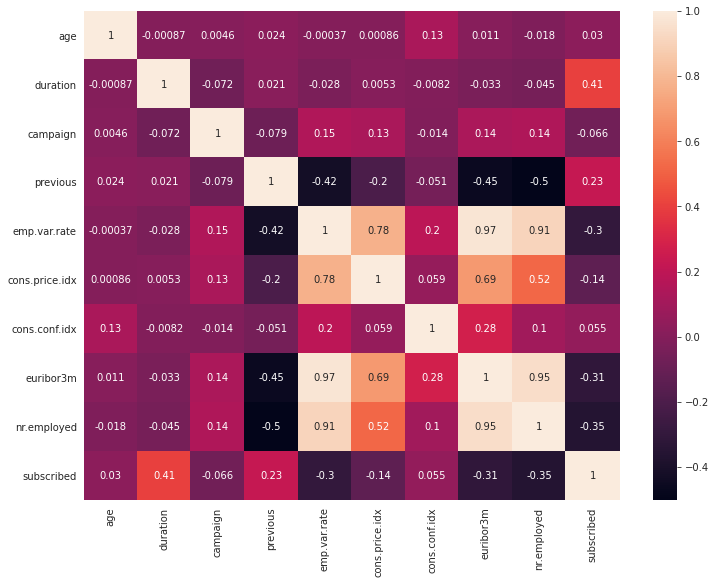

In [9]:
# check correllation of variables in the dataset
plt.figure(figsize=(12,9))
sns.heatmap(bank.corr(), annot=True)

In [10]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

## Dropping different columns and passing new data into a new Variable

In [11]:
# drop columns
bank2 = bank.drop(['job', 'marital', 'education', 'default',
                   'contact', 'month', 'day_of_week', 'duration',
                   'pdays','emp.var.rate',
                   'previous', 'cons.price.idx', 'cons.conf.idx',
                   'euribor3m', 'nr.employed'], axis=1)
bank2.columns

Index(['age', 'housing', 'loan', 'campaign', 'poutcome', 'subscribed'], dtype='object')

In [12]:
bank2['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [13]:
bank2.head()

,age,housing,loan,campaign,poutcome,subscribed
0,56,no,no,1,nonexistent,0
1,57,no,no,1,nonexistent,0
2,37,yes,no,1,nonexistent,0
3,40,no,no,1,nonexistent,0
4,56,no,yes,1,nonexistent,0


In [14]:
bank2.isna().sum()

age           0
housing       0
loan          0
campaign      0
poutcome      0
subscribed    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


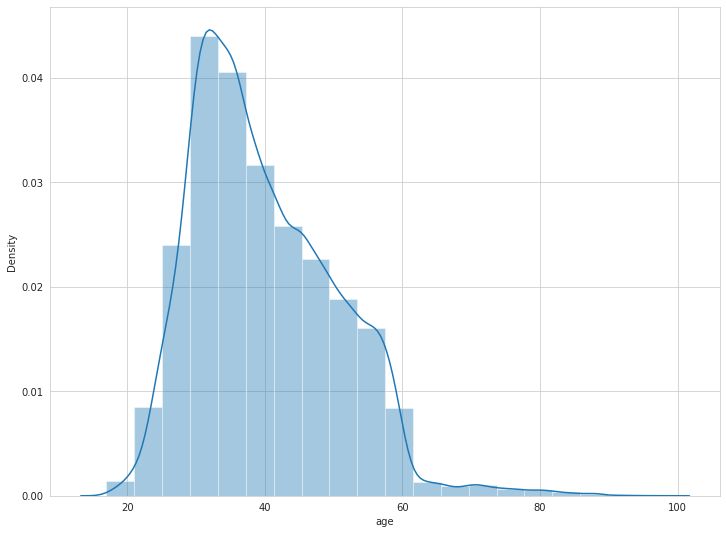

In [15]:
# check age distribution
plt.figure(figsize=(12,9))
sns.distplot(bank2['age'], bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


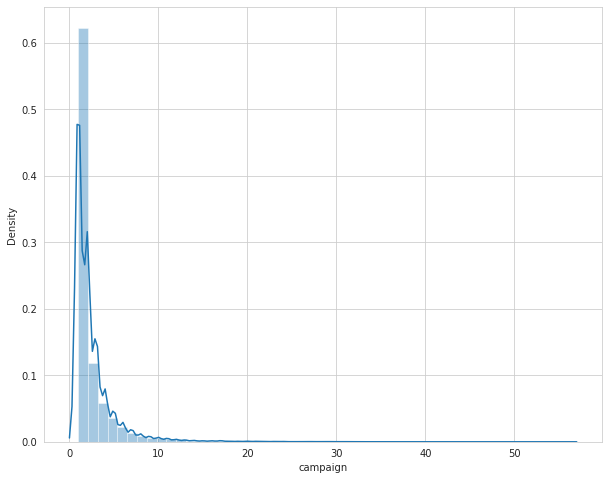

In [16]:
# check distribution of variable
plt.figure(figsize=(10,8))
sns.distplot(bank2['campaign'])

In [17]:
# Data overview
bank2.head()

,age,housing,loan,campaign,poutcome,subscribed
0,56,no,no,1,nonexistent,0
1,57,no,no,1,nonexistent,0
2,37,yes,no,1,nonexistent,0
3,40,no,no,1,nonexistent,0
4,56,no,yes,1,nonexistent,0


In [18]:
# One hot encoding for discrete variables
final_data = pd.get_dummies(bank2, columns=['housing', 'loan', 'poutcome'], drop_first=True)
final_data.head()

,age,campaign,subscribed,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,56,1,0,0,0,0,0,1,0
1,57,1,0,0,0,0,0,1,0
2,37,1,0,0,1,0,0,1,0
3,40,1,0,0,0,0,0,1,0
4,56,1,0,0,0,0,1,1,0


## Create First Model: Using Housing, Personal, Previous Outcome

### Logistic Regression

In [19]:
# splitting data into dependent and independent variables
X = final_data.drop('subscribed', axis=1)
y = final_data['subscribed']

In [20]:
# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [21]:
#check for randomization 
X_train.head()

,age,campaign,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
7019,31,4,0,1,0,0,1,0
27175,51,3,0,1,0,0,1,0
15817,39,3,0,0,0,0,1,0
40971,68,4,0,1,0,0,0,0
8467,37,3,0,1,0,0,1,0


In [22]:
# assigning variable to model
model = LogisticRegression()

In [23]:
# fitting the data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# assigning prediction data to variable
y_pred = model.predict(X_test)

In [25]:
# import libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
# score the model
print(accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

0.8982762806506434


              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10975
           1       0.66      0.19      0.30      1382

    accuracy                           0.90     12357
   macro avg       0.78      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



[[10836   139]
 [ 1118   264]]


### Random Forest

In [28]:
# further analysis using random forest to improve model performance
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_1 = RandomForestClassifier()

In [30]:
model_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred_1 = model_1.predict(X_test)

In [32]:
print(accuracy_score(y_test, y_pred_1))
print('\n')
print(classification_report(y_test, y_pred_1))
print('\n')
print(confusion_matrix(y_test, y_pred_1))

0.8896172210083354


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10975
           1       0.52      0.16      0.24      1382

    accuracy                           0.89     12357
   macro avg       0.71      0.57      0.59     12357
weighted avg       0.86      0.89      0.86     12357



[[10778   197]
 [ 1167   215]]


### Create Second Model using columns: Campaign Contacts, Prev Days after last contact, Number of Previous Contacts, Previous Outcome

### Logistic Regression

In [33]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [34]:
# choosing columns for new dataset to be passed into model
# drop columns
final_2 = bank.drop(['job', 'marital', 'education','default','housing', 'loan', 'contact', 
                     'month','day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m',
                     'nr.employed'], axis=1)
final_2.head()

,age,campaign,pdays,previous,poutcome,subscribed
0,56,1,No,0,nonexistent,0
1,57,1,No,0,nonexistent,0
2,37,1,No,0,nonexistent,0
3,40,1,No,0,nonexistent,0
4,56,1,No,0,nonexistent,0


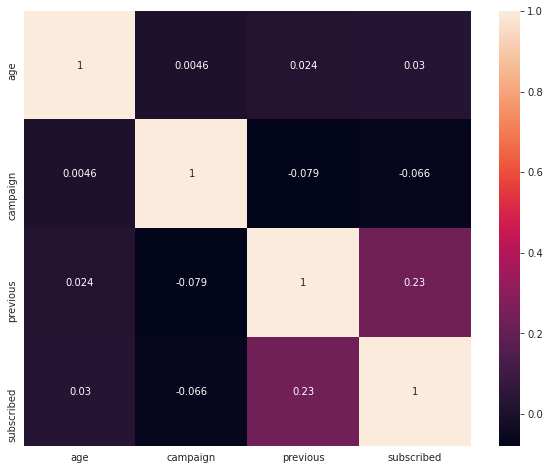

In [35]:
# check variables correllation
plt.figure(figsize=(10,8))
sns.heatmap(final_2.corr(), annot=True)

In [36]:
final_2.head(2)

,age,campaign,pdays,previous,poutcome,subscribed
0,56,1,No,0,nonexistent,0
1,57,1,No,0,nonexistent,0


In [37]:
final_2 = pd.get_dummies(final_2, columns=['pdays', 'poutcome'], drop_first=True)
final_2.head()

,age,campaign,previous,subscribed,pdays_Yes,poutcome_nonexistent,poutcome_success
0,56,1,0,0,0,1,0
1,57,1,0,0,0,1,0
2,37,1,0,0,0,1,0
3,40,1,0,0,0,1,0
4,56,1,0,0,0,1,0


In [38]:
final_2.isna().sum()

age                     0
campaign                0
previous                0
subscribed              0
pdays_Yes               0
poutcome_nonexistent    0
poutcome_success        0
dtype: int64

## Creating Second Model

In [39]:
# splitting data into dependent and independent variables
X2 = final_2.drop('subscribed', axis=1)
y2 = final_2['subscribed']

In [40]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=100)

In [41]:
model_2 = LogisticRegression()

In [42]:
model_2.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y2_pred = model_2.predict(X2_test)

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
print(accuracy_score(y2_test, y2_pred))
print('\n')
print(classification_report(y2_test, y2_pred))
print('\n')
print(confusion_matrix(y2_test, y2_pred))

0.8983572064416929


              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10975
           1       0.65      0.19      0.30      1382

    accuracy                           0.90     12357
   macro avg       0.78      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



[[10832   143]
 [ 1113   269]]


## ----------------------------------------------------------------------------------------------------------------

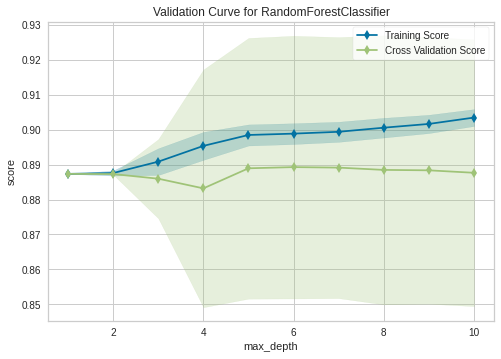

AxesSubplot(0.125,0.125;0.775x0.755)


In [52]:
# Importing libraries
# from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import validation_curve
plt.figure(figsize=(10,8))

# bank_s = shuffle(final_data, random_state=3) # Shuffling the data

# X0 = .iloc[:,:-1] # Feature matrix in pd.DataFrame format
# y0 = final_data.iloc[:,-1] # Target vector in pd.Series format

# Making a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, criterion='gini',
                           max_depth=None, n_jobs=-1, random_state=42)

# Plot the validation curve
print(validation_curve(rf, X, y, param_name="max_depth", n_jobs=-1,param_range=np.arange(1, 11), cv=10, scoring="accuracy"))

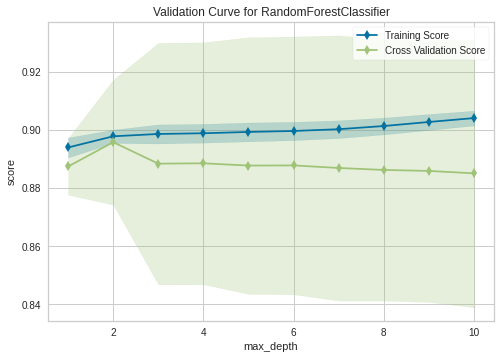

AxesSubplot(0.125,0.125;0.775x0.755)


In [53]:
# Importing libraries
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import validation_curve 
# from sklearn.model_selection import validation_curve

# Making a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, criterion='gini',
                           max_depth=None, n_jobs=-1, random_state=42)

# Plot the validation curve
print(validation_curve(rf, X2, y2, param_name="max_depth", n_jobs=-1,param_range=np.arange(1, 11), cv=10, scoring="accuracy"))

In [57]:
# Plot Accuracy Score of Model: First Model 

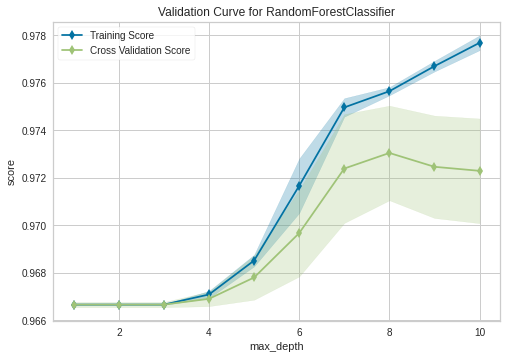

AxesSubplot(0.125,0.125;0.775x0.755)


In [56]:
from sklearn.utils import shuffle
df = shuffle(final_data, random_state=100) # Shuffling the data

X3 = df.iloc[:,:-1] # Feature matrix in pd.DataFrame format
y3 = df.iloc[:,-1] # Target vector in pd.Series format

# Making a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, criterion='gini',
                           max_depth=None, n_jobs=-1, random_state=42)

# Plot the validation curve
print(validation_curve(rf, X3, y3, param_name="max_depth", n_jobs=-1, param_range=np.arange(1, 11), cv=10, scoring="accuracy"))


In [58]:
# Plot Accuracy Score of Model: Second Model 

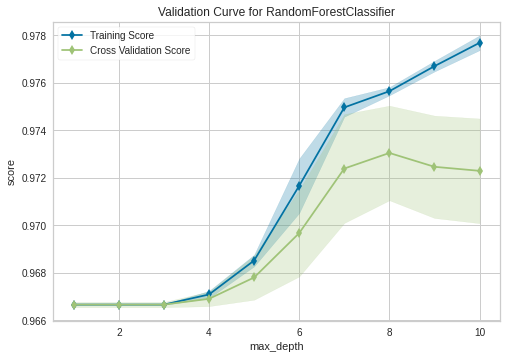

AxesSubplot(0.125,0.125;0.775x0.755)


In [59]:
from sklearn.utils import shuffle
df = shuffle(final_2, random_state=100) # Shuffling the data

X4 = df.iloc[:,:-1] # Feature matrix in pd.DataFrame format
y4 = df.iloc[:,-1] # Target vector in pd.Series format

# Making a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, criterion='gini',
                           max_depth=None, n_jobs=-1, random_state=42)

# Plot the validation curve
print(validation_curve(rf, X3, y3, param_name="max_depth", n_jobs=-1, param_range=np.arange(1, 11), cv=10, scoring="accuracy"))
